In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/MyDrive/CSE_578/CSE578_Project/

/content/gdrive/MyDrive/CSE_578/CSE578_Project


In [3]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
raw_data_df = pd.read_csv('adult.txt')
raw_data_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']
raw_data_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
raw_data_df = raw_data_df[~(raw_data_df == ' ?').any(axis=1)]
raw_data_df.to_csv('preprocessed_data.csv', index=None)

In [6]:
train_df = pd.read_csv('preprocessed_data.csv')
train_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
for col in list(train_df.columns):
  if type(train_df[col].iloc[0]) == type('str'):
    train_df[col] = train_df[col].str.strip()

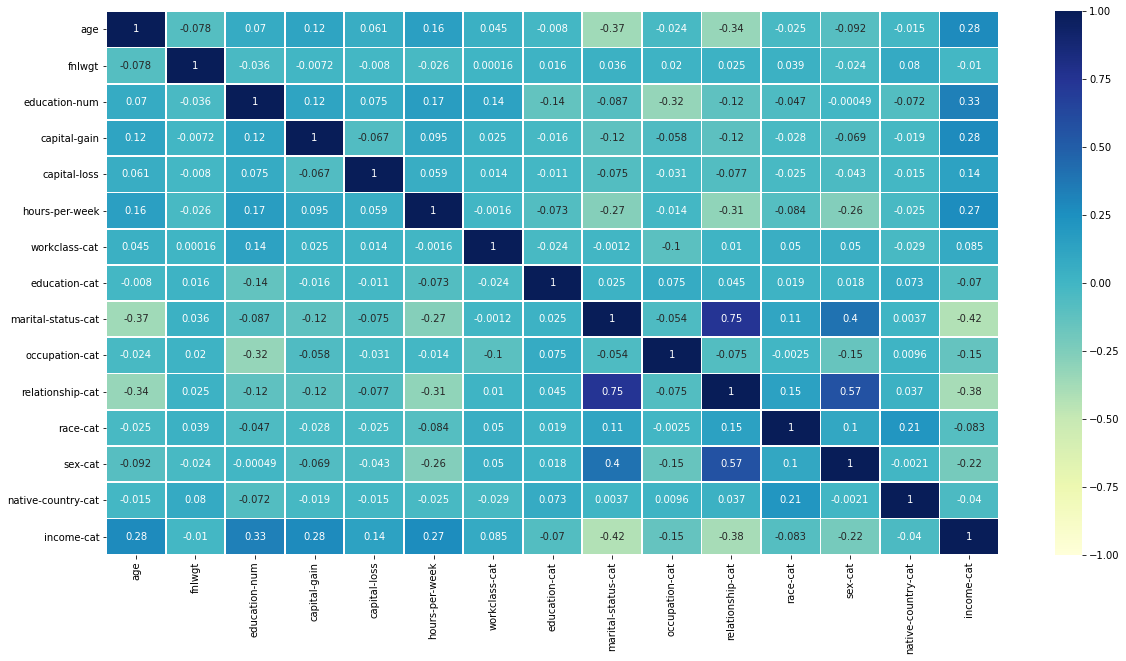

In [8]:
categorical_features = train_df.select_dtypes(include=[np.object]).columns

for feature in categorical_features:
    train_df['{0}-cat'.format(feature)] = pd.factorize(train_df[feature])[0]

plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(train_df.corr(method='spearman'), vmax=1, vmin=-1, annot=True, linewidths=.8, cmap='YlGnBu');

Age

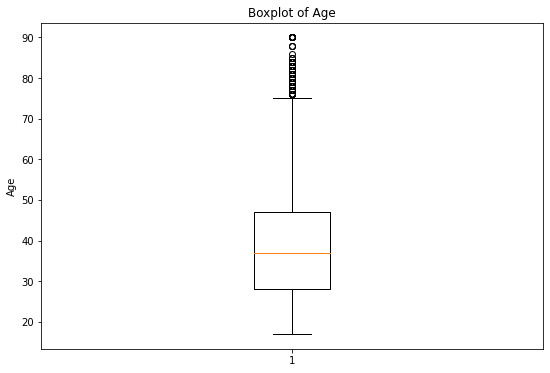

In [9]:
plt.figure(figsize=(9,6))
plt.boxplot(train_df['age'])
plt.ylabel('Age')
plt.title('Boxplot of Age')
plt.show()

Work class

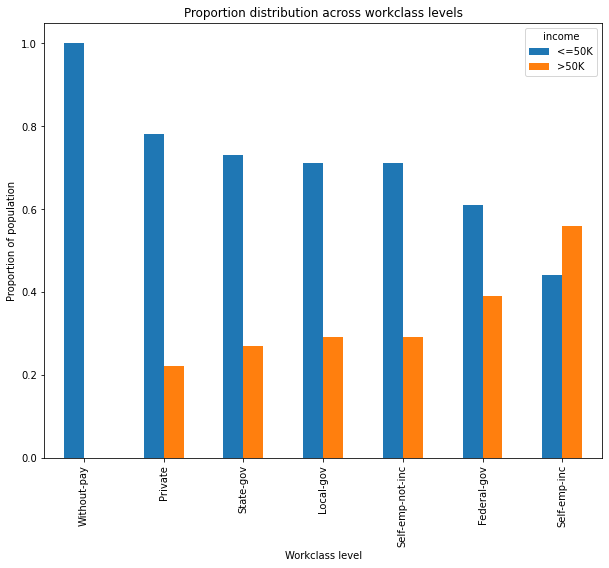

In [10]:
workclass = round(pd.crosstab(train_df.workclass, train_df.income).div(pd.crosstab(train_df.workclass, train_df.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')
plt.show()

Final Weight

In [11]:
Min = train_df['fnlwgt'].min()
Max = train_df['fnlwgt'].max()
Median = train_df['fnlwgt'].std()
Mean = train_df['fnlwgt'].mean()
print("Final Weight Analysis")
print("Minimum:", Min)
print("Maximum",Max)
print("Median",Median)
print("Mean",Mean)

Final Weight Analysis
Minimum: 13769
Maximum 1484705
Median 105652.74491875793
Mean 189797.5565465336


Education

In [12]:
columns_and_count = train_df['education'].value_counts()
name = columns_and_count.index.tolist()
count = columns_and_count.tolist()

education_df = pd.DataFrame()
education_df['Name'] = name 
education_df['Count'] = count
print(education_df)

            Name  Count
0        HS-grad   9840
1   Some-college   6678
2      Bachelors   5043
3        Masters   1627
4      Assoc-voc   1307
5           11th   1048
6     Assoc-acdm   1008
7           10th    820
8        7th-8th    557
9    Prof-school    542
10           9th    455
11          12th    377
12     Doctorate    375
13       5th-6th    288
14       1st-4th    151
15     Preschool     45


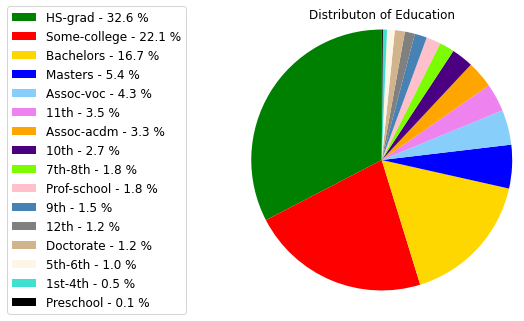

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.char.array(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool'])
y = np.array([9840, 6678, 5044, 1627, 1307, 1048, 1008, 820, 557, 542, 455, 377, 375, 288, 151, 45])
colors = ['green','red','gold','blue','lightskyblue','violet','orange','indigo','lawngreen','pink','steelblue','gray','tan','oldlace','turquoise','black']
percent = 100.*y/y.sum()

plt.figure(figsize=(5,5))
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),key=lambda x: x[2],reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.9,0.5),fontsize=12)
plt.title('Distributon of Education', fontsize = 12)
plt.show()

In [14]:
from collections import Counter

pos_df = train_df[train_df['income'] == '>50K']
neg_df = train_df[train_df['income'] == '<=50K']

one = Counter(pos_df['education'].tolist())
two = Counter(neg_df['education'].tolist())

print(">50K Entries:")
print(one)
print("<=50K Entries:")
print(two)

>50K Entries:
Counter({'Bachelors': 2126, 'HS-grad': 1617, 'Some-college': 1336, 'Masters': 918, 'Prof-school': 406, 'Assoc-voc': 344, 'Doctorate': 280, 'Assoc-acdm': 256, '10th': 59, '11th': 59, '7th-8th': 35, '12th': 29, '9th': 25, '5th-6th': 12, '1st-4th': 6})
<=50K Entries:
Counter({'HS-grad': 8223, 'Some-college': 5342, 'Bachelors': 2917, '11th': 989, 'Assoc-voc': 963, '10th': 761, 'Assoc-acdm': 752, 'Masters': 709, '7th-8th': 522, '9th': 430, '12th': 348, '5th-6th': 276, '1st-4th': 145, 'Prof-school': 136, 'Doctorate': 95, 'Preschool': 45})


In [15]:
labels = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool']
total = [9840, 6678, 5044, 1627, 1307, 1048, 1008, 820, 557, 542, 455, 377, 375, 288, 151, 45]
pos = [1617,1336,2126,918,344,59,256,59,35,406,25,29,280,12,6,0]
perpos = [(pos[x] / total[x])*100 for x in range(len(pos))]
perpos = [round(num, 2) for num in perpos]
print(labels)
print("Percent>50K:",perpos)

neg = [8223,5342,2918,709,963,989,75,761,522,136,430,348,95,276,145,45]
perneg = [(neg[x] / total[x])*100 for x in range(len(neg))]
perneg = [round(num, 2) for num in perneg]
print("Percent <=50K:",perneg)

['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool']
Percent>50K: [16.43, 20.01, 42.15, 56.42, 26.32, 5.63, 25.4, 7.2, 6.28, 74.91, 5.49, 7.69, 74.67, 4.17, 3.97, 0.0]
Percent <=50K: [83.57, 79.99, 57.85, 43.58, 73.68, 94.37, 7.44, 92.8, 93.72, 25.09, 94.51, 92.31, 25.33, 95.83, 96.03, 100.0]


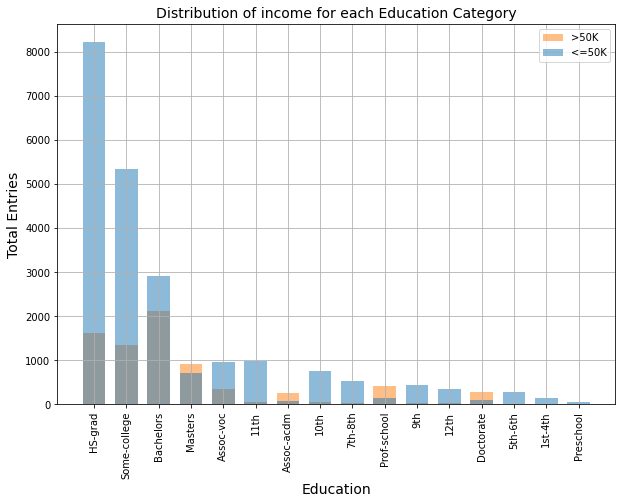

In [16]:
import matplotlib.pyplot as plt

width = 0.7  
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(labels, pos, width, label='>50K', color='tab:orange', alpha = .5)
ax.bar(labels, neg, width, label='<=50K', color='tab:blue', alpha = .5)

ax.set_ylabel('Total Entries', fontsize=14)
ax.set_xlabel('Education', fontsize=14)
ax.set_title('Distribution of income for each Education Category', fontsize=14)
ax.legend()
plt.grid()
plt.xticks(rotation = 90)
plt.show()

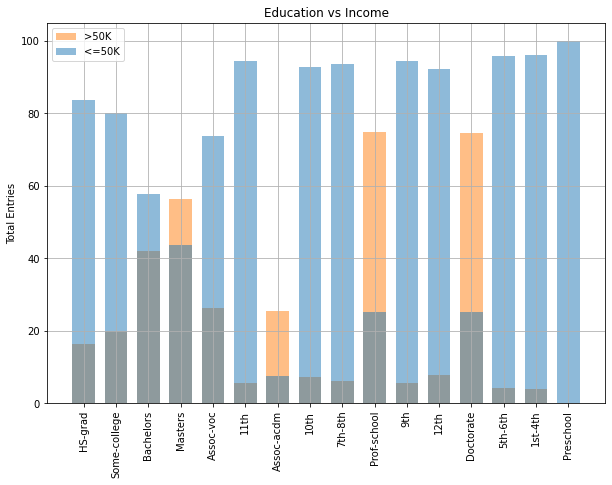

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10,7))
width = 0.7  

ax.bar(labels, perpos, width, label='>50K', color='tab:orange', alpha = .5)
ax.bar(labels, perneg, width, label='<=50K', color='tab:blue', alpha = .5)

ax.set_ylabel('Total Entries')
ax.set_title('Education vs Income')
ax.legend()
plt.grid()
plt.xticks(rotation = 90)
plt.show()

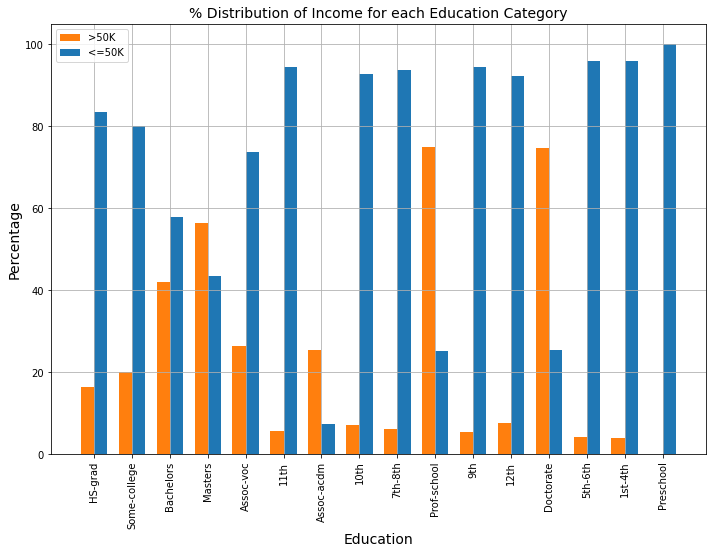

In [18]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, perpos, width, label='>50K', color='tab:orange')
rects2 = ax.bar(x + width/2, perneg, width, label='<=50K', color='tab:blue')

ax.set_ylabel('Percentage', fontsize=14)
ax.set_xlabel('Education', fontsize=14)
ax.set_title('% Distribution of Income for each Education Category', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()


fig.tight_layout()
plt.grid()
plt.xticks(rotation = 90)

plt.show()

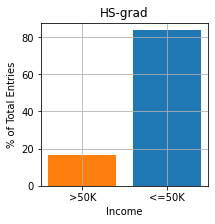

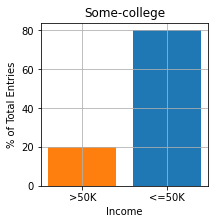

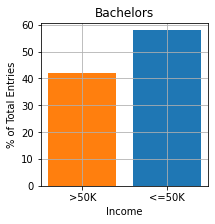

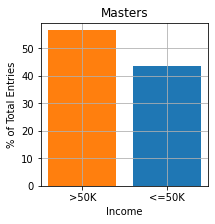

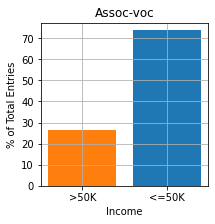

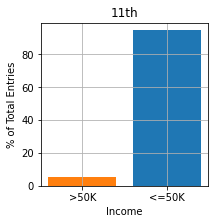

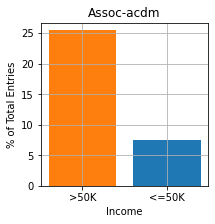

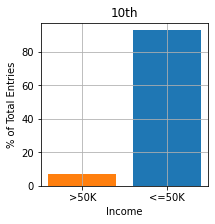

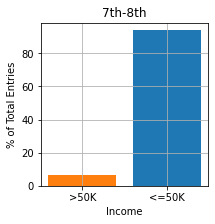

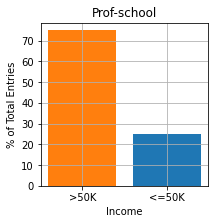

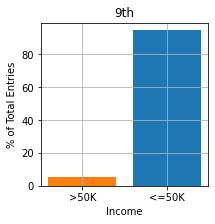

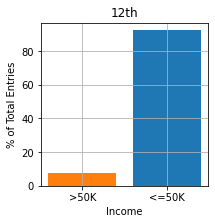

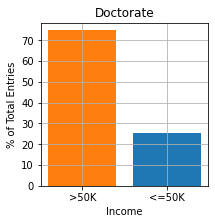

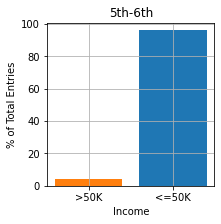

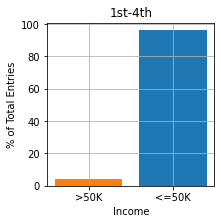

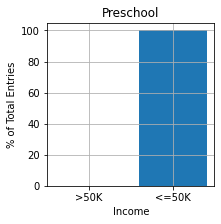

In [19]:
import matplotlib.pyplot as plt

for i in range(len(labels)):
    plt.figure(figsize=(3,3))
    plt.bar('>50K',perpos[i],color='tab:orange')
    plt.bar('<=50K',perneg[i], color='tab:blue')
    plt.title(labels[i])
    plt.xlabel('Income')
    plt.ylabel('% of Total Entries')
    plt.grid()
    plt.show()

In [20]:
from collections import Counter
import matplotlib.pyplot as plt

grt_50k = train_df[train_df['income'] == ">50K"]
less_eq_50k = train_df[train_df['income'] == "<=50K"]

cnt_grt = Counter(grt_50k['marital-status'].tolist())
cnt_less_eq = Counter(less_eq_50k['marital-status'].tolist())

def get_vals(d1):
  key_list = []
  vals_list = []
  for key in d1.keys():
    key_list.append(key)
    vals_list.append(d1[key])

  return key_list, vals_list

p1_labels, p1_vals = get_vals(cnt_grt)
p2_labels, p2_vals = get_vals(cnt_less_eq)

print('>50K', p1_labels, " Values:", p1_vals)
print('<=50K', p2_labels, " Values:", p2_vals)

>50K ['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']  Values: [6399, 470, 452, 66, 80, 31, 10]
<=50K ['Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed']  Values: [7666, 3762, 339, 9255, 873, 11, 747]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


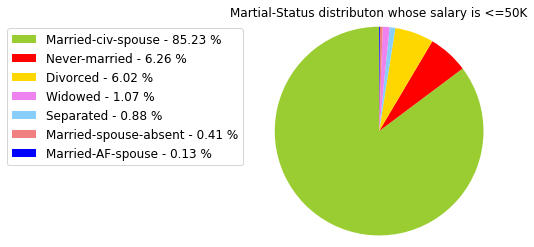

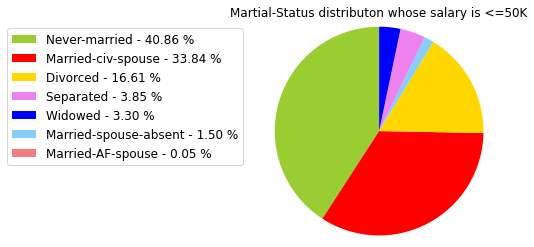

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.char.array(['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'])
y1 = np.array([6399, 470, 452, 66, 80, 31, 10])

x2 = np.char.array(['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'])
y2 = np.array([9256, 7666, 3762, 339, 873, 11, 747])

def plot_pie(x,y):
  colors = ['yellowgreen','red','gold','lightskyblue','violet','lightcoral','blue']
  porcent = 100.*y/y.sum()

  plt.figure(figsize=(4,4))
  patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
  labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

  sort_legend = True
  if sort_legend:
      patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                            key=lambda x: x[2],
                                            reverse=True))


  plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
            fontsize=12)
  plt.title('Martial-Status distributon whose salary is <=50K', fontsize = 12)

plot_pie(x1,y1)
plot_pie(x2,y2)

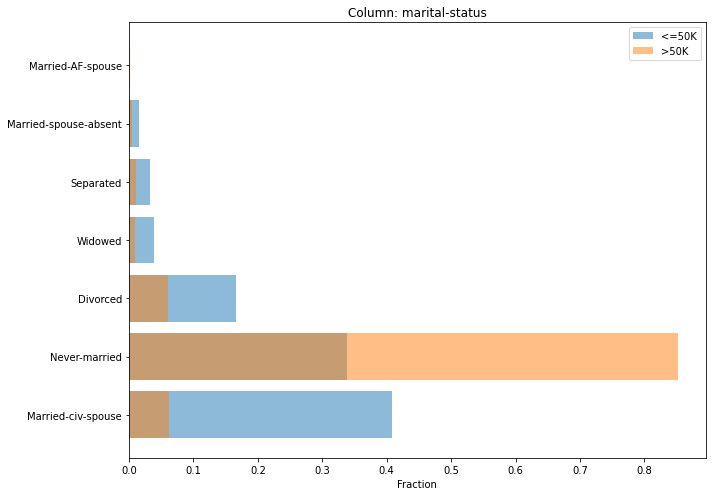

In [22]:
import matplotlib.pyplot as plt
import numpy as np

low_income = train_df.loc[train_df['income'] == '<=50K', 'marital-status']
high_income = train_df.loc[train_df['income'] == '>50K', 'marital-status']

low_income_stats = low_income.value_counts()
high_income_stats = high_income.value_counts()

plt.figure(figsize=(10,7))

low_bar = plt.barh(
    low_income_stats.index,
    low_income_stats.values / low_income_stats.values.sum(),
    alpha=0.5,
)
high_bar = plt.barh(
    high_income_stats.index,
    high_income_stats.values / high_income_stats.values.sum(),
    alpha=0.5,
)

plt.title('Column: ' + 'marital-status')
plt.xlabel('Fraction')
plt.legend([low_bar, high_bar], ['<=50K', '>50K'])
plt.yticks(np.arange(len(high_income_stats)), high_income_stats.index)
plt.tight_layout()
plt.show()

Race

Race vs Income


Text(0, 0.5, 'Proportion of population')

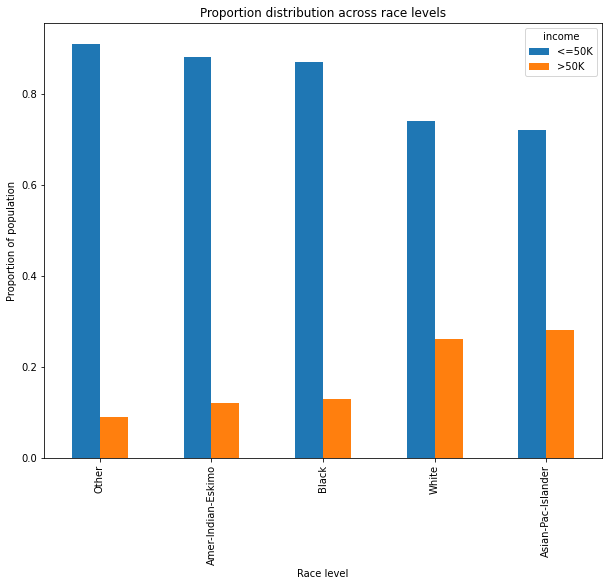

In [23]:
print("Race vs Income")
race = round(pd.crosstab(train_df.race, train_df.income).div(pd.crosstab(train_df.race, train_df.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')

Sex

In [24]:
#Gender  data
train_df['sex'].value_counts()

#Male data
print('Male data')
df_Male = train_df[train_df['sex']==' Male']
df_Male['income'].value_counts()

Male data


Series([], Name: income, dtype: int64)

In [25]:
#Female data
print('Female data')
df_Female = train_df[train_df['sex']==' Female']
df_Female['income'].value_counts()

Female data


Series([], Name: income, dtype: int64)

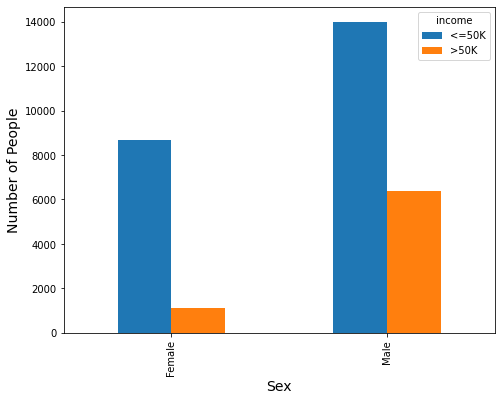

In [26]:
fig = plt.figure(figsize = (17,6))
table_sex = pd.crosstab(train_df['sex'], train_df['income'])
ax = fig.add_subplot(1,2,2)
table_sex.plot(kind = 'bar',ax =ax)
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Number of People',fontsize = 14);

Capital Gain and Capital Loss

In [27]:
print('capital-gain')
capital_gain_df = train_df['capital-gain']
capital_gain_df.describe()

capital-gain


count    30161.000000
mean      1091.971984
std       7406.466659
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [28]:
print('capital-loss')
capital_loss_df = train_df['capital-loss']
capital_loss_df.describe()

capital-loss


count    30161.000000
mean        88.375419
std        404.304753
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

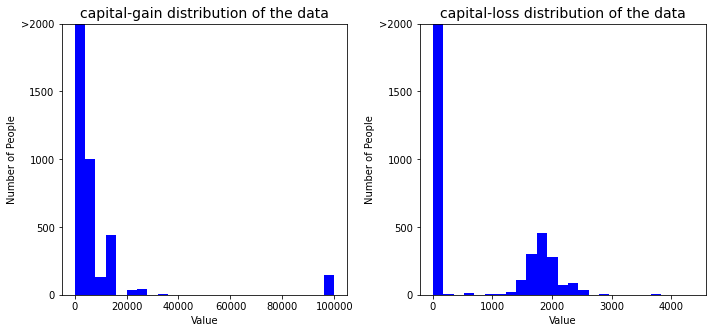

In [29]:
fig = plt.figure(figsize = (10,13));
cols = ['capital-gain','capital-loss']
# Skewed feature plotting
i = 1
for col in cols:
    ax = fig.add_subplot(3, 2 ,i)
    ax.hist(train_df[col], bins = 25, color = 'blue')
    ax.set_title(f"{col} distribution of the data", fontsize = 14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of People")
    ax.set_ylim((0, 2000))
    ax.set_yticks([0, 500, 1000, 1500, 2000])
    ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])
    i += 1
fig.tight_layout()
fig.show()

Native Countries and Hours-per-week

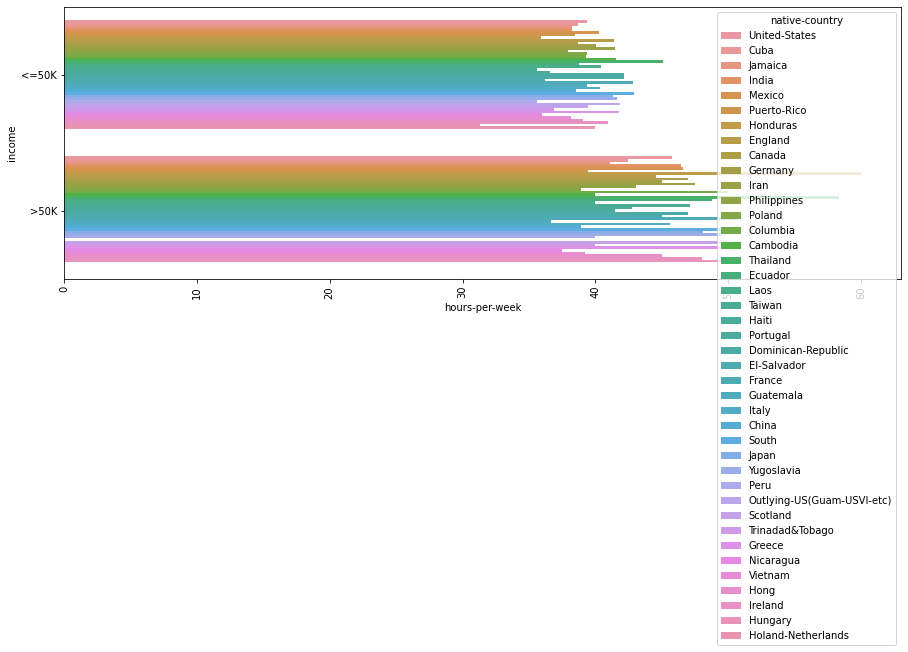

In [30]:
plt.figure(figsize=(15, 5))
sns.barplot(x="hours-per-week", y="income", hue='native-country', data=train_df, ci=None)
plt.xticks(rotation=90);
plt.show()

In [31]:
features = list(set(train_df.columns.tolist()) - set('income'))

In [32]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex', 'native-country']
non_categorical = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [33]:
train_df[categorical]

,workclass,education,marital-status,occupation,relationship,sex,native-country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,Female,United-States
...,...,...,...,...,...,...,...
30156,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,United-States
30157,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,United-States
30158,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,United-States
30159,Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,United-States


In [34]:
categorical_one_hot = pd.get_dummies(train_df[categorical])
noncategorical_one_hot = train_df[non_categorical]
one_hot_data = pd.concat([categorical_one_hot, noncategorical_one_hot], axis=1, join='inner')

In [35]:
train_df['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
30156    <=50K
30157     >50K
30158    <=50K
30159    <=50K
30160     >50K
Name: income, Length: 30161, dtype: object

In [36]:
from sklearn.preprocessing import label_binarize
labels = label_binarize(train_df['income'], classes=['<=50K', '>50K'])

In [37]:
one_hot_data

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,...,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50,83311,13,0,0,13
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,38,215646,9,0,0,40
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,53,234721,7,0,0,40
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,338409,13,0,0,40
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,37,284582,14,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,27,257302,12,0,0,38
30157,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,40,154374,9,0,0,40
30158,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,58,151910,9,0,0,40
30159,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,22,201490,9,0,0,20


In [38]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(one_hot_data)  
train_data = scaler.transform(one_hot_data)

In [39]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(one_hot_data, labels, test_size  = 0.25)

In [40]:
from sklearn import svm
print('SVM Rbf kernel results')
svm_clf_rbf = svm.SVC(kernel = 'rbf', C = 1, tol = 1e-3)
svm_clf_rbf.fit(train_data, train_label)
svm_clf_rbf_pred = svm_clf_rbf.predict(test_data)
test_label = test_label.reshape((-1, ))
from sklearn.metrics import classification_report
print(classification_report(test_label, svm_clf_rbf_pred))


print('SVM linear kernel results')
svm_clf_linear = svm.SVC(kernel = 'linear')
svm_clf_linear.fit(train_data, train_label)
svm_clf_linear_pred = svm_clf_linear.predict(test_data)
test_label = test_label.reshape((-1, ))
from sklearn.metrics import classification_report
print(classification_report(test_label, svm_clf_linear_pred))

SVM Rbf kernel results


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5708
           1       0.98      0.15      0.26      1833

    accuracy                           0.79      7541
   macro avg       0.88      0.58      0.57      7541
weighted avg       0.83      0.79      0.73      7541

SVM linear kernel results


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.81      0.95      0.87      5708
           1       0.66      0.31      0.42      1833

    accuracy                           0.79      7541
   macro avg       0.73      0.63      0.65      7541
weighted avg       0.77      0.79      0.76      7541



In [41]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier with gini criterion')
r_forest_gini = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_gini.fit(train_data, train_label)
r_forest_gini_pred = r_forest_gini.predict(test_data)
test_label = test_label.reshape((-1, ))
from sklearn.metrics import classification_report
print(classification_report(test_label, r_forest_gini_pred))

print('Random Forest Classifier with entropy criterion')
r_forest_entropy = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_entropy.fit(train_data, train_label)
r_forest_entropy_pred = r_forest_entropy.predict(test_data)
test_label = test_label.reshape((-1, ))
from sklearn.metrics import classification_report
print(classification_report(test_label, r_forest_entropy_pred))

Random Forest Classifier with gini criterion


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5708
           1       0.74      0.58      0.65      1833

    accuracy                           0.85      7541
   macro avg       0.81      0.76      0.78      7541
weighted avg       0.84      0.85      0.84      7541

Random Forest Classifier with entropy criterion


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5708
           1       0.74      0.58      0.65      1833

    accuracy                           0.85      7541
   macro avg       0.81      0.76      0.78      7541
weighted avg       0.84      0.85      0.84      7541

